<a href="https://colab.research.google.com/github/masa-yo1/Reserch_tennis/blob/main/swing_vision_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92_%E3%82%B3%E3%83%BC%E3%83%889%E5%88%86%E5%89%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/tennis_data/match_2023_01_10

/content/drive/MyDrive/tennis_data/match_2023_01_10


In [ ]:
df=pd.read_csv('vs_kubo_1.csv')
condition = df['Stroke'] == 'Feed'
subset = df[condition]
df = df.drop(subset.index)
len(df)

733

In [ ]:
def in_to_1_outnet_to_0(val):
    if val == 'In':
        return 1
    else:
        return 0

In [ ]:
df['Result'] = df['Result'].apply(in_to_1_outnet_to_0)
df['Bounce (y)'] = abs(df['Bounce (y)'] -11.885)   #深さをネットからの距離に
df['Hit (y)'] = abs(df['Hit (y)'] -11.885)

In [ ]:
#Shotが1に戻るまでを1ラリーとして、試合を通してのラリー数を書いた列を追加するコードを書いて下さい。
#ただし、Typeがsecond_serveの時だけは、ラリー数をそのままにして下さい
rally_count = 0
prev_shot = 1
rally_list = []
for index, row in df.iterrows():
    if row['Type'] != 'second_serve':
        if row['Shot'] == 1:
            rally_count += 1
        rally_list.append(rally_count)
        prev_shot = row['Shot']
    else:
        rally_list.append(rally_list[-1])

df['Rally'] = rally_list

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,Player,Shot,Type,Stroke,Spin,Speed (KM/H),Point,Game,Set,Bounce Depth,Bounce Zone,Bounce Side,Bounce (x),Bounce (y),Hit Depth,Hit Zone,Hit Side,Hit (x),Hit (y),Hit (z),Direction,Result,Favorited,Start Time,Video Time,Rally
0,龍哉 久保,1,first_serve,Serve,Flat,98.436745,1,0,0,service_box,deuce,near,1.540818,4.327014,no_mans_land,deuce,far,-0.784507,11.792910,2.704495,down the T,1,False,11:46:11,10.20,1
1,Yoshizawa Masatsugu,2,return,Backhand,Topspin,67.991951,1,0,0,no_mans_land,ad,far,0.641170,9.733553,out,deuce,near,2.866704,12.576038,1.140431,inside in,1,False,11:46:12,11.40,1
2,龍哉 久保,3,serve_plus_one,Forehand,Topspin,91.792122,1,0,0,no_mans_land,ad,near,-1.712300,7.789904,out,ad,far,0.378104,14.079935,1.302506,inside out,1,False,11:46:14,13.13,1
3,Yoshizawa Masatsugu,4,return_plus_one,Backhand,Topspin,74.643082,1,0,0,no_mans_land,ad,far,1.157406,8.686537,out,ad,near,-2.544409,12.938649,0.938888,cross court,1,False,11:46:15,14.51,1
4,龍哉 久保,5,in_play,Forehand,Topspin,88.915466,1,0,0,no_mans_land,ad,near,-0.719358,7.536090,out,ad,far,1.816429,14.363003,1.121761,inside out,1,False,11:46:17,16.15,1


In [ ]:
#コートを9分割　Bounceについて
# エリアの境界線の座標を計算する
def get_area(x, y):
    if x < -1.372:
        if y < 3.96:
            return "C"
        elif y < 7.92:
            return "F"
        else:
            return "I"
    elif x < 1.372:
        if y < 3.96:
            return "B"
        elif y < 7.92:
            return "E"
        else:
            return "H"
    else:
        if y < 3.96:
            return "A"
        elif y < 7.92:
            return "D"
        else:
            return "G"

df['Bounce_area'] = df.apply(lambda row: get_area(row['Bounce (x)'], row['Bounce (y)']), axis=1)



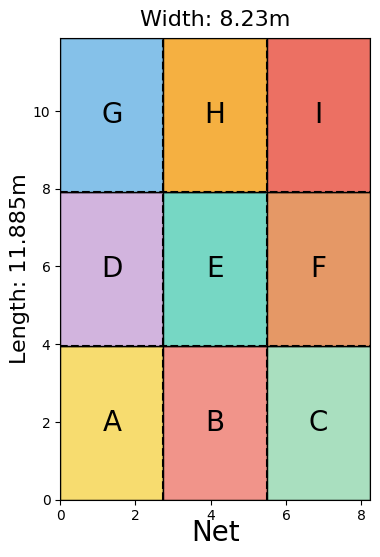

In [ ]:
import matplotlib.pyplot as plt

# テニスコートの大きさ
court_length = 11.885
court_width = 8.23

# グラフの設定
fig, ax = plt.subplots()
fig.set_size_inches(4, 6)
ax.set_xlim(0, court_width)
ax.set_ylim(0, court_length)


# グリッドを描画
block_width = court_width / 3
block_length = court_length / 3
for i in range(1, 3):
    ax.axhline(i * block_length, linestyle='--', color='black')
for i in range(1, 3):
    ax.axvline(i * block_width, linestyle='--', color='black')

# 領域ごとに色を指定
colors = ['#F7DC6F', '#D2B4DE', '#85C1E9', '#F1948A', '#76D7C4', '#F5B041', '#A9DFBF', '#E59866', '#EC7063']
for i in range(3):
    for j in range(3):
        x = i * block_width
        y = j * block_length
        ax.add_patch(plt.Rectangle((x, y), block_width, block_length, facecolor=colors[j+i*3], edgecolor='black'))

# 軸にテキストを描画
ax.text(court_width / 2, court_length + 0.2, f"Width: {court_width}m", fontsize=16, ha='center', va='bottom')
ax.text(-0.8, court_length / 2, f"Length: {court_length}m", fontsize=16, ha='right', va='center', rotation=90)
# 下部にテキストを描画
ax.text(court_width / 2, -0.5, "Net", fontsize=20, ha='center', va='top')

# テキストを描画
for i in range(3):
    for j in range(3):
        x = i * block_width + block_width / 2
        y = j * block_length + block_length / 2
        label = chr(65+i+j*3)
        ax.text(x, y, label, fontsize=20, ha='center', va='center')

plt.show()


In [ ]:
#コートを9分割　Hitzoneについて
# エリアの境界線の座標を計算する


def get_area(x, y):
    if x < -1.372:
        if y < 5.94:
            return "c"
        elif  y< 8.91:
            return "f"
        else:
            return "i"
    elif x < 1.372:
        if y < 5.94:
            return "b"
        elif y < 8.91:
            return "e"
        else:
            return "h"
    else:
        if y < 5.94:
            return "a"
        elif y < 8.91:
            return "d"
        else:
            return "g"

df['Hit_area'] = df.apply(lambda row: get_area(row['Hit (x)'], row['Hit (y)']), axis=1)

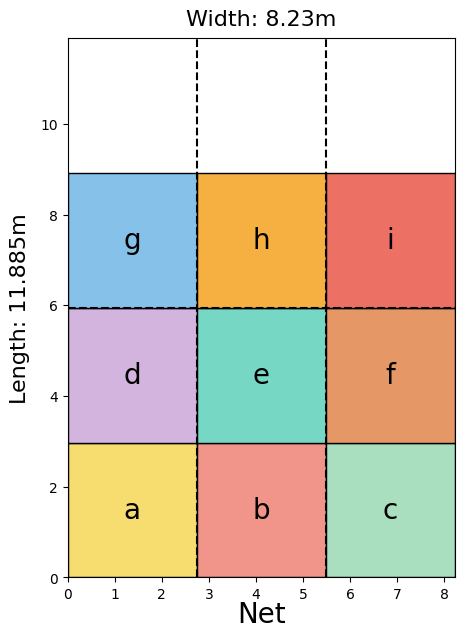

In [ ]:
import matplotlib.pyplot as plt

# テニスコートの大きさ
court_length = 11.885
court_width = 8.23

# グラフの設定
fig, ax = plt.subplots()
fig.set_size_inches(5, 7)
ax.set_xlim(0, court_width)
ax.set_ylim(0, court_length)


# グリッドを描画
block_width = court_width / 3
block_length = court_length / 4

# 横方向のグリッドを描画

ax.axhline(2 * block_length, linestyle='--', color='black')

for i in range(1, 3):
    ax.axvline(i * block_width, linestyle='--', color='black')


# 領域ごとに色を指定
colors = ['#F7DC6F', '#D2B4DE', '#85C1E9', '#F1948A', '#76D7C4', '#F5B041', '#A9DFBF', '#E59866', '#EC7063']
for i in range(3):
    for j in range(3):
        x = i * block_width
        y = j * block_length
        ax.add_patch(plt.Rectangle((x, y), block_width, block_length, facecolor=colors[j+i*3], edgecolor='black'))

# 軸にテキストを描画
ax.text(court_width / 2, court_length + 0.2, f"Width: {court_width}m", fontsize=16, ha='center', va='bottom')
ax.text(-0.8, court_length / 2, f"Length: {court_length}m", fontsize=16, ha='right', va='center', rotation=90)
# 下部にテキストを描画
ax.text(court_width / 2, -0.5, "Net", fontsize=20, ha='center', va='top')

# テキストを描画
for i in range(3):
    for j in range(3):
        x = i * block_width + block_width / 2
        y = j * block_length + block_length / 2
        label = chr(97+i+j*3)
        ax.text(x, y, label, fontsize=20, ha='center', va='center')

plt.show()

In [ ]:
# ラリー番号ごとにループを回す
for rally_num in range(1, df['Rally'].max() + 1):
    # ラリー番号が一致する行を抽出
    rally_df = df[df['Rally'] == rally_num]
    
    # ラリーの最後の行を抽出
    last_shot = rally_df.tail(1)
    
    # Point acquisitionを1にする条件に合致するかを判定
    if last_shot['Player'].values[0] == 'Yoshizawa Masatsugu' and last_shot['Result'].values[0] == 1:
        point_acquisition = 1
    elif last_shot['Player'].values[0] == '龍哉 久保' and last_shot['Result'].values[0] == 0:
        point_acquisition = 1
    else:
        point_acquisition = 0
    
    # ラリー全体に値をセット
    df.loc[df['Rally'] == rally_num, 'Point acquisition'] = point_acquisition


In [ ]:
#'Bounce (x)' 列と 'Bounce (y)' 一つずらしたdfを作成
df['Bounce (x)'] = df['Bounce (x)'].shift()
df['Bounce (y)'] = df['Bounce (y)'].shift()
#サーブとリターンの行は削除
df = df[df["Stroke"] != "Serve"]
df = df[df["Type"] != "return"]
df_kubo = df[df['Player'] =='龍哉 久保']
df_yoshizawa = df[df['Player'] == 'Yoshizawa Masatsugu']

In [ ]:
df.head()

,Player,Shot,Type,Stroke,Spin,Speed (KM/H),Point,Game,Set,Bounce Depth,Bounce Zone,Bounce Side,Bounce (x),Bounce (y),Hit Depth,Hit Zone,Hit Side,Hit (x),Hit (y),Hit (z),Direction,Result,Favorited,Start Time,Video Time,Rally,Bounce_area,Hit_area,Point acquisition
2,龍哉 久保,3,serve_plus_one,Forehand,Topspin,91.792122,1,0,0,no_mans_land,ad,near,0.641170,9.733553,out,ad,far,0.378104,14.079935,1.302506,inside out,1,False,11:46:14,13.130000,1,F,h,1.0
3,Yoshizawa Masatsugu,4,return_plus_one,Backhand,Topspin,74.643082,1,0,0,no_mans_land,ad,far,-1.712300,7.789904,out,ad,near,-2.544409,12.938649,0.938888,cross court,1,False,11:46:15,14.510000,1,H,i,1.0
4,龍哉 久保,5,in_play,Forehand,Topspin,88.915466,1,0,0,no_mans_land,ad,near,1.157406,8.686537,out,ad,far,1.816429,14.363003,1.121761,inside out,1,False,11:46:17,16.150000,1,E,g,1.0
5,Yoshizawa Masatsugu,6,in_play,Backhand,Topspin,72.283096,1,0,0,service_box,ad,far,-0.719358,7.536090,out,ad,near,-1.248331,13.851430,1.185831,cross court,1,False,11:46:18,17.530001,1,E,h,1.0
6,龍哉 久保,7,in_play,Forehand,Topspin,44.372288,1,0,0,service_box,deuce,near,0.429961,4.240902,no_mans_land,ad,far,1.238550,10.230923,0.944325,inside in,1,False,11:46:20,19.250000,1,D,h,1.0


In [ ]:
df_yoshizawa = df_yoshizawa[['Shot','Bounce_area', 'Hit_area', 'Point acquisition', 'Rally']]
df_kubo = df_kubo[['Shot','Bounce_area', 'Hit_area', 'Point acquisition', 'Rally']]

In [ ]:
import warnings
# 警告文を非表示
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder

# ラベルエンコーディングを行うために、LabelEncoderクラスをインスタンス化（利用するためのおまじないだとお考えください）
enc = LabelEncoder() # encはencoderの省略名称である変数です。

#Stroke

#label_encoder = enc.fit(df_yoshizawa[["Stroke"]])

# カラムの要素を取得
#integer_classes = label_encoder.transform(label_encoder.classes_)

#df_yoshizawa["Stroke"] = label_encoder.transform(df_yoshizawa[["Stroke"]])

#Bounce_area Categorical classes: 

label_encoder = enc.fit(df_yoshizawa[["Bounce_area"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_yoshizawa["Bounce_area"] = label_encoder.transform(df_yoshizawa[["Bounce_area"]])

#Hit_area Categorical classes:
label_encoder = enc.fit(df_yoshizawa[["Hit_area"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_yoshizawa["Hit_area"] = label_encoder.transform(df_yoshizawa[["Hit_area"]])

In [ ]:
import warnings
# 警告文を非表示
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder

# ラベルエンコーディングを行うために、LabelEncoderクラスをインスタンス化（利用するためのおまじないだとお考えください）
enc = LabelEncoder() # encはencoderの省略名称である変数です。
# fit()によりTypeカラムに対してラベルエンコーディングを行います。

#Stroke

#label_encoder = enc.fit(df_kubo[["Stroke"]])

# カラムの要素を取得
#integer_classes = label_encoder.transform(label_encoder.classes_)

#df_kubo["Stroke"] = label_encoder.transform(df_kubo[["Stroke"]])

#Spin Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]

label_encoder = enc.fit(df_kubo[["Bounce_area"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_kubo["Bounce_area"] = label_encoder.transform(df_kubo[["Bounce_area"]])

#Hit_area Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_kubo[["Hit_area"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_kubo["Hit_area"] = label_encoder.transform(df_kubo[["Hit_area"]])

In [ ]:
df_yoshizawa.head()

,Shot,Bounce_area,Hit_area,Point acquisition,Rally
3,4,7,8,1.0,1
5,6,4,7,1.0,1
7,9,6,3,1.0,1
16,4,5,6,0.0,3
25,4,3,8,0.0,6


[LightGBM] [Info] Number of positive: 89, number of negative: 79
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529762 -> initscore=0.119189
[LightGBM] [Info] Start training from score 0.119189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.682852
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.686143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.689461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.691399

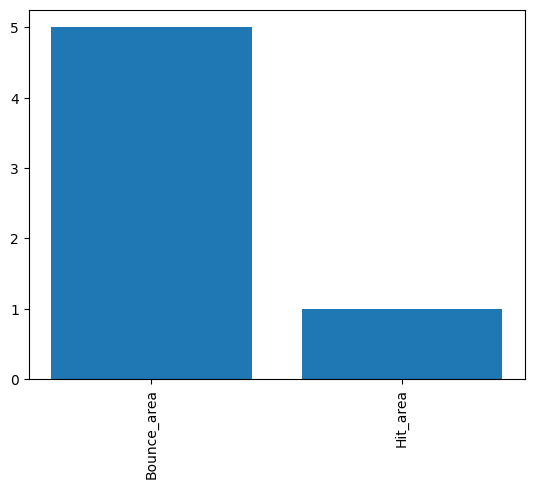

In [ ]:
# 必要なライブラリをインポートする
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split


data = df_yoshizawa

# 特徴量と目的変数を分ける
X = data.drop(['Point acquisition','Rally', 'Shot'],axis=1)
y = data['Point acquisition']

# 訓練用データとテスト用データに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#データをLightGBMの形式に変換する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# モデルの定義
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, early_stopping_rounds=10)

# 各特徴量の重要度を表示
importance = model.feature_importance()
for i in range(len(X.columns)):
    print(X.columns[i], ':', importance[i])

# テスト用データを用いてモデルの精度を評価する
y_pred = model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]  # しきい値0.5でクラスを決定
# モデルの評価
accuracy = sum([1 if y_pred[i] == y_test.iloc[i] else 0 for i in range(len(y_test))]) / len(y_test)
print('Accuracy:', accuracy)

# 特徴量の重要度をグラフに描画
import matplotlib.pyplot as plt
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance_df = importance_df.sort_values(by='importance', ascending=False)
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
y_pred = model.predict(X)
y_proba = np.column_stack((1 - y_pred, y_pred))

for i in range(len(X)):
    print(f"Sample {i}: Class 0: {y_proba[i][0]:.4f}, Class 1: {y_proba[i][1]:.4f}")



Sample 0: Class 0: 0.4756, Class 1: 0.5244
Sample 1: Class 0: 0.4661, Class 1: 0.5339
Sample 2: Class 0: 0.4552, Class 1: 0.5448
Sample 3: Class 0: 0.4661, Class 1: 0.5339
Sample 4: Class 0: 0.4768, Class 1: 0.5232
Sample 5: Class 0: 0.4632, Class 1: 0.5368
Sample 6: Class 0: 0.4632, Class 1: 0.5368
Sample 7: Class 0: 0.4632, Class 1: 0.5368
Sample 8: Class 0: 0.4756, Class 1: 0.5244
Sample 9: Class 0: 0.4632, Class 1: 0.5368
Sample 10: Class 0: 0.4661, Class 1: 0.5339
Sample 11: Class 0: 0.4552, Class 1: 0.5448
Sample 12: Class 0: 0.4661, Class 1: 0.5339
Sample 13: Class 0: 0.4768, Class 1: 0.5232
Sample 14: Class 0: 0.4552, Class 1: 0.5448
Sample 15: Class 0: 0.4596, Class 1: 0.5404
Sample 16: Class 0: 0.4632, Class 1: 0.5368
Sample 17: Class 0: 0.4941, Class 1: 0.5059
Sample 18: Class 0: 0.4596, Class 1: 0.5404
Sample 19: Class 0: 0.4756, Class 1: 0.5244
Sample 20: Class 0: 0.4768, Class 1: 0.5232
Sample 21: Class 0: 0.4661, Class 1: 0.5339
Sample 22: Class 0: 0.4596, Class 1: 0.540

In [ ]:
df_yoshizawa_classifier_confidence = df_yoshizawa.copy()
new_col_name = "Point acquisition rate"
# テスト用データのクラスの確率を予測する
y_proba =  np.column_stack((1 - y_pred, y_pred))
# 新しい列をデータフレームに追加する
df_yoshizawa_classifier_confidence[new_col_name] = y_proba[:, 1]
df_yoshizawa_classifier_confidence.head()

,Shot,Bounce_area,Hit_area,Point acquisition,Rally,Point acquisition rate
3,4,7,8,1.0,1,0.524402
5,6,4,7,1.0,1,0.533926
7,9,6,3,1.0,1,0.544754
16,4,5,6,0.0,3,0.533926
25,4,3,8,0.0,6,0.523210


In [ ]:
import matplotlib.pyplot as plt

def plot_rally(df, rally):
    rally_df = df[df['Rally'] == rally]
    x = rally_df['Shot']
    y = rally_df['Point acquisition rate']
    plt.plot(x, y)
    plt.xlabel('Shot')
    plt.ylabel('Point acquisition rate')
    plt.title('Rally {}'.format(rally))
    plt.show()


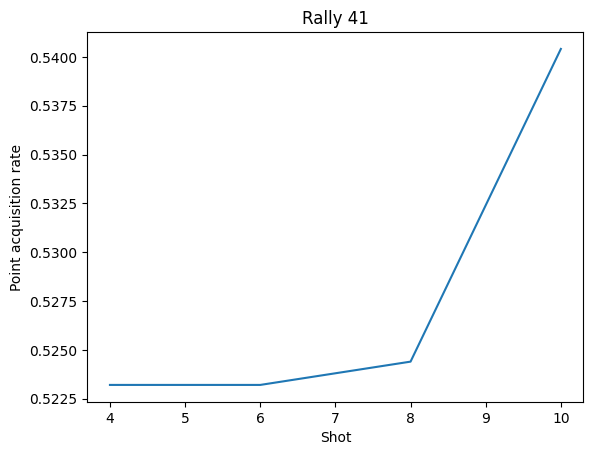

In [ ]:
plot_rally(df_yoshizawa_classifier_confidence,  41)

[LightGBM] [Info] Number of positive: 111, number of negative: 68
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 179, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620112 -> initscore=0.490022
[LightGBM] [Info] Start training from score 0.490022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.706607
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.707845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.708595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.71017

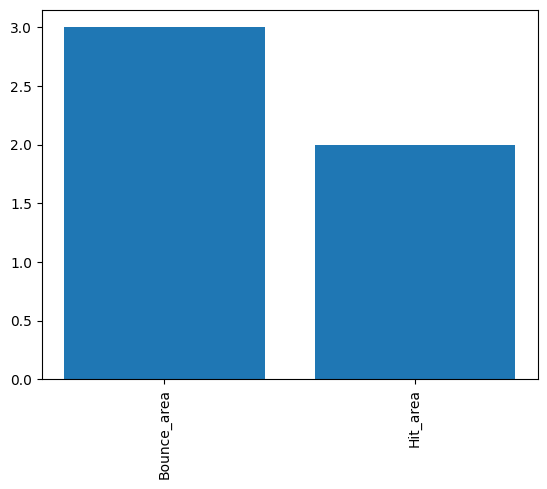

In [ ]:
#久保の方
# 必要なライブラリをインポートする
i# 必要なライブラリをインポートする
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split


data = df_kubo

# 特徴量と目的変数を分ける
X = data.drop(['Point acquisition','Rally', 'Shot'],axis=1)
y = data['Point acquisition']

# 訓練用データとテスト用データに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#データをLightGBMの形式に変換する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# モデルの定義
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
}
model_k = lgb.train(params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, early_stopping_rounds=10)

# 各特徴量の重要度を表示
importance = model_k.feature_importance()
for i in range(len(X.columns)):
    print(X.columns[i], ':', importance[i])

# テスト用データを用いてモデルの精度を評価する
y_pred_kubo = model_k.predict(X_test)
y_pred_kubo  = [1 if pred > 0.5 else 0 for pred in y_pred_kubo ]  # しきい値0.5でクラスを決定
# モデルの評価
accuracy = sum([1 if y_pred_kubo [i] == y_test.iloc[i] else 0 for i in range(len(y_test))]) / len(y_test)
print('Accuracy:', accuracy)

# 特徴量の重要度をグラフに描画
import matplotlib.pyplot as plt
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance_df = importance_df.sort_values(by='importance', ascending=False)
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
y_pred_kubo  = model_k.predict(X)
y_proba_kubo  = np.column_stack((1 - y_pred_kubo , y_pred_kubo ))

for i in range(len(X)):
    print(f"Sample {i}: Class 0: {y_proba_kubo [i][0]:.4f}, Class 1: {y_proba_kubo [i][1]:.4f}")

Sample 0: Class 0: 0.3810, Class 1: 0.6190
Sample 1: Class 0: 0.3851, Class 1: 0.6149
Sample 2: Class 0: 0.3951, Class 1: 0.6049
Sample 3: Class 0: 0.3851, Class 1: 0.6149
Sample 4: Class 0: 0.3851, Class 1: 0.6149
Sample 5: Class 0: 0.3951, Class 1: 0.6049
Sample 6: Class 0: 0.3621, Class 1: 0.6379
Sample 7: Class 0: 0.3700, Class 1: 0.6300
Sample 8: Class 0: 0.3851, Class 1: 0.6149
Sample 9: Class 0: 0.3621, Class 1: 0.6379
Sample 10: Class 0: 0.3810, Class 1: 0.6190
Sample 11: Class 0: 0.3851, Class 1: 0.6149
Sample 12: Class 0: 0.3700, Class 1: 0.6300
Sample 13: Class 0: 0.3786, Class 1: 0.6214
Sample 14: Class 0: 0.3786, Class 1: 0.6214
Sample 15: Class 0: 0.3700, Class 1: 0.6300
Sample 16: Class 0: 0.3786, Class 1: 0.6214
Sample 17: Class 0: 0.3810, Class 1: 0.6190
Sample 18: Class 0: 0.3700, Class 1: 0.6300
Sample 19: Class 0: 0.3851, Class 1: 0.6149
Sample 20: Class 0: 0.3951, Class 1: 0.6049
Sample 21: Class 0: 0.3621, Class 1: 0.6379
Sample 22: Class 0: 0.3851, Class 1: 0.614

In [ ]:
#久保の方はclass0が得点する確率

df_kubo_classifier_confidence = df_kubo.copy()
new_col_name = "Point acquisition rate"
# テスト用データのクラスの確率を予測する
y_proba_kubo = np.column_stack((1 - y_pred_kubo , y_pred_kubo ))
# 新しい列をデータフレームに追加する
df_kubo_classifier_confidence[new_col_name] = y_proba_kubo[:, 0]
df_kubo_classifier_confidence.head()

,Shot,Bounce_area,Hit_area,Point acquisition,Rally,Point acquisition rate
2,3,5,7,1.0,1,0.381031
4,5,4,6,1.0,1,0.385095
6,7,3,7,1.0,1,0.395137
8,10,1,6,1.0,1,0.385095
12,3,1,6,1.0,2,0.385095


## 新データで予測

In [ ]:
df_new = pd.read_csv('match_2023_12_23.csv')
condition = df_new['Stroke'] == 'Feed'
subset = df_new[condition]
df_new = df_new.drop(subset.index)
df_new['Result'] = df_new['Result'].apply(in_to_1_outnet_to_0)
df_new['Bounce (y)'] = abs(df_new['Bounce (y)'] -11.885)   #深さをネットからの距離に
df_new['Hit (y)'] = abs(df_new['Hit (y)'] -11.885)

In [ ]:
#Shotが1に戻るまでを1ラリーとして、試合を通してのラリー数を書いた列を追加するコードを書いて下さい。
#ただし、Typeがsecond_serveの時だけは、ラリー数をそのままにして下さい
rally_count = 0
prev_shot = 1
rally_list = []
for index, row in df_new.iterrows():
    if row['Type'] != 'second_serve':
        if row['Shot'] == 1:
            rally_count += 1
        rally_list.append(rally_count)
        prev_shot = row['Shot']
    else:
        rally_list.append(rally_list[-1])

df_new['Rally'] = rally_list

In [ ]:
# ラリー番号ごとにループを回す
for rally_num in range(1, df_new['Rally'].max() + 1):
    # ラリー番号が一致する行を抽出
    rally_df = df_new[df_new['Rally'] == rally_num]
    
    # ラリーの最後の行を抽出
    last_shot = rally_df.tail(1)
    
    # Point acquisitionを1にする条件に合致するかを判定
    if last_shot['Player'].values[0] == 'Yoshizawa Masatsugu' and last_shot['Result'].values[0] == 1:
        point_acquisition = 1
    elif last_shot['Player'].values[0] == '龍哉 久保' and last_shot['Result'].values[0] == 0:
        point_acquisition = 1
    else:
        point_acquisition = 0
    
    # ラリー全体に値をセット
    df_new.loc[df_new['Rally'] == rally_num, 'Point acquisition'] = point_acquisition


In [ ]:
#コートを9分割　Bounceについて
# エリアの境界線の座標を計算する
#コートを9分割　Bounceについて
# エリアの境界線の座標を計算する
def get_area(x, y):
    if x < -1.372:
        if y < 3.96:
            return "C"
        elif y < 7.92:
            return "F"
        else:
            return "I"
    elif x < 1.372:
        if y < 3.96:
            return "B"
        elif y < 7.92:
            return "E"
        else:
            return "H"
    else:
        if y < 3.96:
            return "A"
        elif y < 7.92:
            return "D"
        else:
            return "G"


df_new['Bounce_area'] = df_new.apply(lambda row: get_area(row['Bounce (x)'], row['Bounce (y)']), axis=1)

In [ ]:
#コートを9分割　Hitzoneについて
# エリアの境界線の座標を計算する


def get_area(x, y):
    if x < -1.372:
        if y < 5.94:
            return "c"
        elif  y< 8.91:
            return "f"
        else:
            return "i"
    elif x < 1.372:
        if y < 5.94:
            return "b"
        elif y < 8.91:
            return "e"
        else:
            return "h"
    else:
        if y < 5.94:
            return "a"
        elif y < 8.91:
            return "d"
        else:
            return "g"

df_new['Hit_area'] = df_new.apply(lambda row: get_area(row['Hit (x)'], row['Hit (y)']), axis=1)

In [ ]:
df_new['Bounce (x)'] = df_new['Bounce (x)'].shift()
df_new['Bounce (y)'] = df_new['Bounce (y)'].shift()
#サーブとリターンを除外
df_new = df_new[df_new["Stroke"] != "Serve"]
df_new = df_new[df_new["Type"] != "return"]
df_new['Result'] = df_new['Result'].apply(in_to_1_outnet_to_0)
df_new_kubo = df_new[df_new['Player'] =='龍哉 久保']
df_new_yoshizawa = df_new[df_new['Player'] == 'Yoshizawa Masatsugu']

In [ ]:
df_new_yoshizawa = df_new_yoshizawa[['Shot', 'Bounce_area', 'Hit_area', 'Point acquisition','Rally']]
df_new_kubo = df_new_kubo[['Shot', 'Bounce_area', 'Hit_area', 'Point acquisition','Rally']]

In [ ]:
enc = LabelEncoder() # encはencoderの省略名称である変数です。

#Stroke

#label_encoder = enc.fit(df_new_yoshizawa[["Stroke"]])
#integer_classes = label_encoder.transform(label_encoder.classes_)
#df_new_yoshizawa["Stroke"] = label_encoder.transform(df_new_yoshizawa[["Stroke"]])

#Bounce_area Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]
label_encoder = enc.fit(df_new_yoshizawa[["Bounce_area"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Bounce_area"] = label_encoder.transform(df_new_yoshizawa[["Bounce_area"]])

#Hit_area Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_new_yoshizawa[["Hit_area"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Hit_area"] = label_encoder.transform(df_new_yoshizawa[["Hit_area"]])


In [ ]:
enc = LabelEncoder() # encはencoderの省略名称である変数です。
# fit()によりTypeカラムに対してラベルエンコーディングを行います。

#Stroke

#label_encoder = enc.fit(df_new_kubo[["Stroke"]])
#integer_classes = label_encoder.transform(label_encoder.classes_)
#df_new_kubo["Stroke"] = label_encoder.transform(df_new_kubo[["Stroke"]])

#Bounce_area Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]
label_encoder = enc.fit(df_new_kubo[["Bounce_area"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_kubo["Bounce_area"] = label_encoder.transform(df_new_kubo[["Bounce_area"]])

#Hit_area Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_new_kubo[["Hit_area"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_kubo["Hit_area"] = label_encoder.transform(df_new_kubo[["Hit_area"]])

In [ ]:
df_new_yoshizawa_1 = df_new_yoshizawa.drop(['Point acquisition', 'Shot', 'Rally'], axis =1)
df_new_kubo_1 = df_new_kubo.drop(['Point acquisition', 'Shot', 'Rally'], axis =1)
df_new_yoshizawa_1.head()

,Bounce_area,Hit_area
4,7,7
6,3,5
8,5,5
17,4,5
22,8,5


In [ ]:
# テスト用データのクラスの確率を予測する
y_pred = model.predict(df_new_yoshizawa_1)
y_proba = np.column_stack((1 - y_pred, y_pred))

y = df_new_yoshizawa['Point acquisition']

# テスト用データの各サンプルに対する予測確率を出力する
for i in range(len(y)):
    print(f"Sample {i}: Class 0: {y_proba[i][0]}, Class 1: {y_proba[i][1]}")

Sample 0: Class 0: 0.4755984628177913, Class 1: 0.5244015371822087
Sample 1: Class 0: 0.47679046320218754, Class 1: 0.5232095367978125
Sample 2: Class 0: 0.46607359931359127, Class 1: 0.5339264006864087
Sample 3: Class 0: 0.46607359931359127, Class 1: 0.5339264006864087
Sample 4: Class 0: 0.4595931043122682, Class 1: 0.5404068956877318
Sample 5: Class 0: 0.46607359931359127, Class 1: 0.5339264006864087
Sample 6: Class 0: 0.46607359931359127, Class 1: 0.5339264006864087
Sample 7: Class 0: 0.4940973282715456, Class 1: 0.5059026717284544
Sample 8: Class 0: 0.46607359931359127, Class 1: 0.5339264006864087
Sample 9: Class 0: 0.45524574012224583, Class 1: 0.5447542598777542
Sample 10: Class 0: 0.46607359931359127, Class 1: 0.5339264006864087
Sample 11: Class 0: 0.4755984628177913, Class 1: 0.5244015371822087
Sample 12: Class 0: 0.4595931043122682, Class 1: 0.5404068956877318
Sample 13: Class 0: 0.45524574012224583, Class 1: 0.5447542598777542
Sample 14: Class 0: 0.46607359931359127, Class 1:

In [ ]:
df_new_yoshizawa_classifier_confidence = df_new_yoshizawa.copy()
new_col_name = "Point acquisition rate"
# テスト用データのクラスの確率を予測する
y_proba =  np.column_stack((1 - y_pred, y_pred))
# 新しい列をデータフレームに追加する
df_new_yoshizawa_classifier_confidence[new_col_name] = y_proba[:, 1]
df_new_yoshizawa_classifier_confidence.head()

,Shot,Bounce_area,Hit_area,Point acquisition,Rally,Point acquisition rate
4,4,7,7,1.0,1,0.524402
6,6,3,5,1.0,1,0.523210
8,8,5,5,1.0,1,0.533926
17,4,4,5,1.0,3,0.533926
22,4,8,5,1.0,4,0.540407


In [ ]:
# テスト用データのクラスの確率を予測する
y_pred_kubo = model.predict(df_new_kubo_1)
y_proba_kubo = np.column_stack((1 - y_pred_kubo, y_pred_kubo))
y = df_new_kubo['Point acquisition']
# テスト用データの各サンプルに対する予測確率を出力する
for i in range(len(y)):
    print(f"Sample {i}: Class 0: {y_proba_kubo[i][0]}, Class 1: {y_proba_kubo[i][1]}")

Sample 0: Class 0: 0.4940973282715456, Class 1: 0.5059026717284544
Sample 1: Class 0: 0.45524574012224583, Class 1: 0.5447542598777542
Sample 2: Class 0: 0.47679046320218754, Class 1: 0.5232095367978125
Sample 3: Class 0: 0.45524574012224583, Class 1: 0.5447542598777542
Sample 4: Class 0: 0.4595931043122682, Class 1: 0.5404068956877318
Sample 5: Class 0: 0.45524574012224583, Class 1: 0.5447542598777542
Sample 6: Class 0: 0.4940973282715456, Class 1: 0.5059026717284544
Sample 7: Class 0: 0.46607359931359127, Class 1: 0.5339264006864087
Sample 8: Class 0: 0.4940973282715456, Class 1: 0.5059026717284544
Sample 9: Class 0: 0.4595931043122682, Class 1: 0.5404068956877318
Sample 10: Class 0: 0.4940973282715456, Class 1: 0.5059026717284544
Sample 11: Class 0: 0.4940973282715456, Class 1: 0.5059026717284544
Sample 12: Class 0: 0.46607359931359127, Class 1: 0.5339264006864087
Sample 13: Class 0: 0.4940973282715456, Class 1: 0.5059026717284544
Sample 14: Class 0: 0.45524574012224583, Class 1: 0.

In [ ]:
#久保の方はclass0が得点確率
df_new_kubo_classifier_confidence = df_new_kubo.copy()
new_col_name = "Point acquisition rate"
# テスト用データのクラスの確率を予測する
y_proba =  np.column_stack((1 - y_pred_kubo, y_pred_kubo))
# 新しい列をデータフレームに追加する
df_new_kubo_classifier_confidence[new_col_name] = y_proba[:, 0]
df_new_kubo_classifier_confidence.head()

,Shot,Bounce_area,Hit_area,Point acquisition,Rally,Point acquisition rate
3,3,2,3,1.0,1,0.494097
5,5,6,4,1.0,1,0.455246
7,7,3,3,1.0,1,0.476790
9,9,6,5,1.0,1,0.455246
12,3,8,5,1.0,2,0.459593


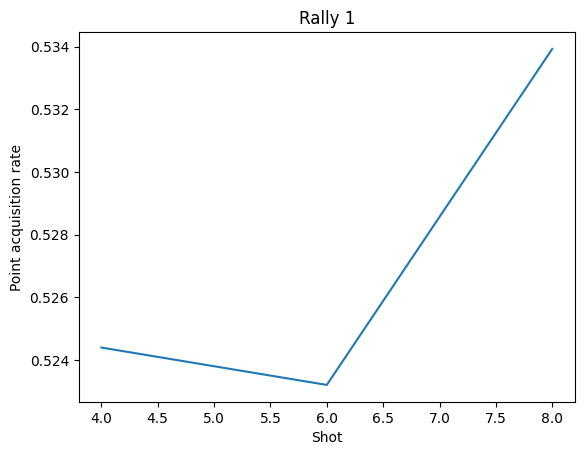

In [ ]:
plot_rally(df_new_yoshizawa_classifier_confidence, 1)

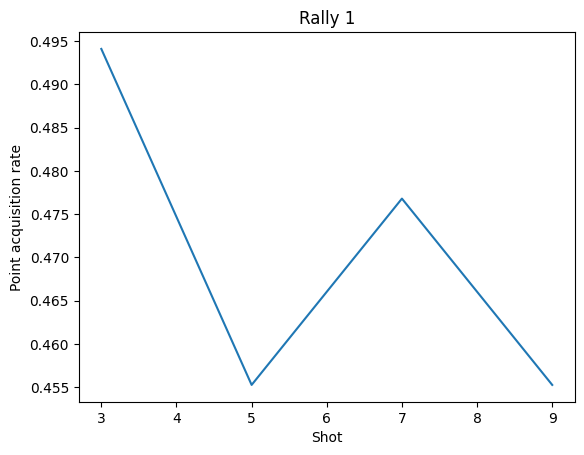

In [ ]:
plot_rally(df_new_kubo_classifier_confidence,  1)

In [ ]:
def plot_rally(df, rally):
    rally_df = df[df['Rally'] == rally]
    x = rally_df['Shot']
    y = rally_df['Point acquisition rate']
    plt.plot(x, y)
    plt.xlabel('Shot')
    plt.ylabel('Point acquisition rate')
    plt.title('Rally {}'.format(rally))
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_rally_1(df_yoshizawa, df_kubo, rally_num):
    # Yoshizawaのデータを抽出
    yoshizawa_df = df_yoshizawa[df_yoshizawa['Rally'] == rally_num]
    
    # Kuboのデータを抽出
    kubo_df = df_kubo[df_kubo['Rally'] == rally_num]
    merged_df = pd.concat([yoshizawa_df, kubo_df])
    # Shotを昇順にソート
    merged_df = merged_df.sort_values(by='Shot')

    # 各データフレームのコピーを作成
    merged_df_yoshizawa = merged_df.copy()
    merged_df_kubo = merged_df.copy()

    # YoshizawaとKuboのShotの配列を作成
    yoshizawa_shots = yoshizawa_df['Shot'].values
    kubo_shots = kubo_df['Shot'].values
    merged_shots = merged_df['Shot'].values

    # YoshizawaとKuboのデータでShotが欠損している箇所を特定
    missing_shots_yoshizawa = [shot for shot in merged_shots if shot not in yoshizawa_shots]
    missing_shots_kubo= [shot for shot in merged_shots if shot not in kubo_shots]

    for shot in missing_shots_yoshizawa:
      merged_df_yoshizawa.loc[merged_df_yoshizawa['Shot'] == shot, 'Point acquisition rate'] = 1 - merged_df_yoshizawa['Point acquisition rate']
    
    for shot in missing_shots_kubo:
      merged_df_kubo.loc[merged_df_kubo['Shot'] == shot, 'Point acquisition rate'] = 1 - merged_df_kubo['Point acquisition rate']

     # Yoshizawaの折れ線グラフをプロット
    plt.plot(merged_df_yoshizawa['Shot'], merged_df_yoshizawa['Point acquisition rate'], color='red', label='Yoshizawa')

    # Kuboの折れ線グラフをプロット
    plt.plot(merged_df_kubo['Shot'], merged_df_kubo['Point acquisition rate'], color='blue', label='Kubo')

    # グラフのタイトル、ラベル、凡例を設定
    plt.title(f'Rally {rally_num} Point Acquisition Rate')
    plt.xlabel('Shot')
    plt.ylabel('Point Acquisition Rate')
    plt.legend()

    # グラフを表示
    # 縦軸の範囲を指定して、グラフを表示
    plt.ylim(0.4, 0.6)
    plt.show()

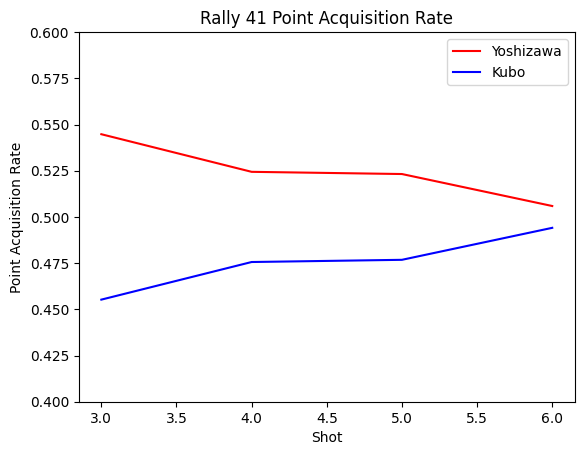

In [ ]:
plot_rally_1(df_new_yoshizawa_classifier_confidence, df_new_kubo_classifier_confidence, 41)  #1,6,11,12,15,16,19,21,23,29,30,31,39,40,41,42,43,51
